Compare the different responses and degradations

29-Jul-2020 IGH

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy import time
from astropy.visualization import time_support
from astropy.time import TimeDelta
import astropy.units as u
import scipy.io as io

import warnings
warnings.simplefilter('ignore')

from aiapy.calibrate import degradation
from aiapy.calibrate.util import get_correction_table

In [2]:
clrs=['darkgreen','darkcyan','gold','sienna','indianred','darkslateblue','cornflowerblue']

In [3]:
# Made in ssw with make_aiaresp_forpy.pro
#   trespe=aia_get_response(/temp,/dn,/eve,version=9)
tren=io.readsav('aia_trespv9_en.dat')
#   trespe=aia_get_response(/temp,/dn,/eve,version=9,/chiantifix)
trench=io.readsav('aia_trespv9_ench.dat')
#   trespe=aia_get_response(/temp,/dn,/eve,version=9,timedepend_date='01-Jan-2014')
tren2014=io.readsav('aia_trespv9_en20140101.dat')

In [4]:
#  Load in beforehand makes things faster later
correction_table = get_correction_table()

In [5]:
# Get the deg factors for 2014-01-01
reft=time.Time('2014-01-01T00:00:00.000',format='isot')
channels = [94, 131, 171, 193, 211, 335] * u.angstrom
nc=len(channels)
degs=np.empty(nc)
for i in np.arange(nc):
    degs[i]=degradation(channels[i],reft,correction_table=correction_table)

In [6]:
print(degs)

[0.88170538 0.75333888 0.85801922 0.9072451  0.8125455  0.44946401]


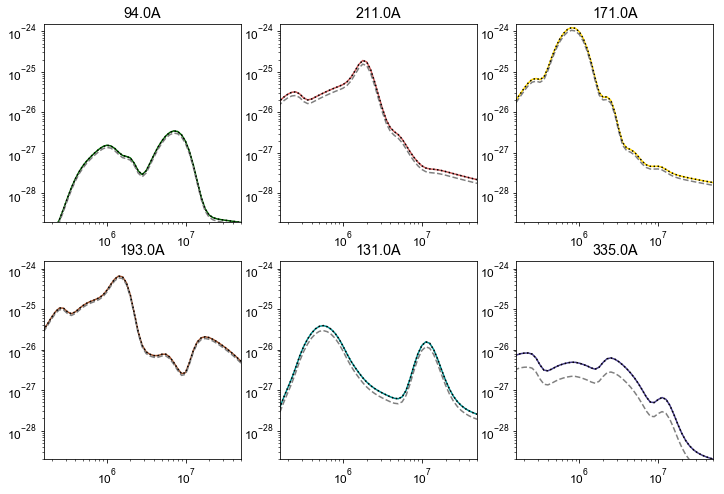

In [7]:
plt.rcParams.update({'font.size': 12,'font.family':"sans-serif",\
                     'font.sans-serif':"Arial",'mathtext.default':"regular"})
nrow=2
ncol=3
fsz=4

fig, ax = plt.subplots(nrows=nrow, ncols=ncol,figsize=(ncol*fsz, nrow*fsz))
for i in np.arange(nc):
    ax[i%nrow,i%ncol].loglog(10**tren['logt'],tren['tr'][i],color=clrs[i])
    ax[i%nrow,i%ncol].set_title(str(channels[i].value)+'A')
    ax[i%nrow,i%ncol].set_ylim([2e-29,1.5e-24])
    ax[i%nrow,i%ncol].set_xlim([10**5.2,10**7.7])
#     overplot the time deg corrected
    ax[i%nrow,i%ncol].loglog(10**tren['logt'],tren2014['tr'][i],color='grey',linestyle='dashed')
#   Can we remove the correction using the calculated deg factor?
#   i..e is the response from ssw without time_dep the same as no deg correction?
    ax[i%nrow,i%ncol].loglog(10**tren['logt'],tren2014['tr'][i]/degs[i],\
                             color='black',linestyle='dotted')

In [8]:
# Appears that ssw version with no time_dep is same a time_dep with deg removed
for i in np.arange(nc):
    test=tren['tr'][i]/(tren2014['tr'][i]/degs[i])
    print(channels[i].value,np.mean(test))
# yes!

94.0 1.0000708051368083
131.0 0.9996278953205516
171.0 0.9999999999999997
193.0 1.000182000815523
211.0 0.9997262514397977
335.0 1.0003228820746766


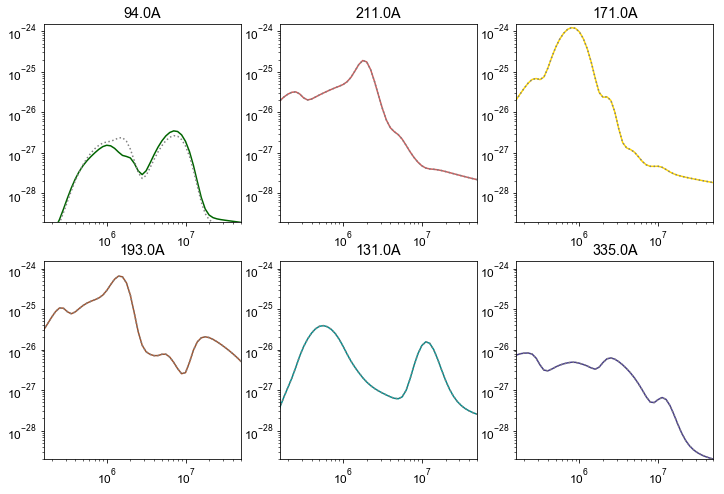

In [9]:
# what about chiantifix - note GdZ () discourages this for fe18
plt.rcParams.update({'font.size': 12,'font.family':"sans-serif",\
                     'font.sans-serif':"Arial",'mathtext.default':"regular"})
nrow=2
ncol=3
fsz=4

fig, ax = plt.subplots(nrows=nrow, ncols=ncol,figsize=(ncol*fsz, nrow*fsz))
for i in np.arange(nc):
    ax[i%nrow,i%ncol].loglog(10**tren['logt'],tren['tr'][i],color=clrs[i])
    ax[i%nrow,i%ncol].set_title(str(channels[i].value)+'A')
    ax[i%nrow,i%ncol].set_ylim([2e-29,1.5e-24])
    ax[i%nrow,i%ncol].set_xlim([10**5.2,10**7.7])
#     overplot the chianti one
    ax[i%nrow,i%ncol].loglog(10**tren['logt'],trench['tr'][i],color='grey',linestyle='dotted')